# Rlab03

- Student: Giovanni Zago
- Course: PoD
- Matriculation number: 2089577

In [26]:
library(tidyverse)
library(ggplot2)
library(patchwork) # to create subplots
library (magrittr)
library(lubridate)
library(scales) # use transparent parameter in plots and use scale_x_continuous
options(repr.plot.width=15, repr.plot.height=8) # allows to display bigger plots
set.seed(09112001) # set seed for reproducibility

# Exercise 1

Study the binomial inference for a study that reports $y = 7$ successes in $n=20$ independent trials. Assume the following priors:
- a uniform distribution
- a Jeffrey’s prior
- a step function:

Plot the posterior distribution and summerize the results computing the first two moments.

Compute a 95% credibility interval and give the results in a summary table.

Draw the limits on the plot of the posterior distribution.

In [2]:
r = 7
n = 20
n_samples = 2000
p = seq(from = 1 / (2 * n_samples), by = 1 / n_samples, length.out = n_samples)
ex1_res = tibble(post_max = numeric(), post_eval = numeric(), post_var = numeric(), cin_l = numeric(), cin_u = numeric(), prior = character())
ex1_values = tibble(post_unif = rep(0, n_samples))

Study the binomial inference using an **uniform prior**.

In [3]:
p_star = dbinom(x = r, size = n, prob = p) * 1 # the * 1 is the prior
Z = sum(p_star) * (1 / n_samples)
post = p_star / Z
ex1_values = ex1_values %>% mutate(post_unif = post, prior_unif = rep(1, n_samples))

max_post = p[which(post == max(post))]
exp_val = sum(p * post) * (1 / n_samples)
variance = sum((p - exp_val) ** 2 * post) * (1 / n_samples)
cat('The expected value from the posterior is ', exp_val, ' while the variance is ', variance, sep = '', '\n')

# define function to calculate the values of the desired percentiles

dist_numintegrate <- function(x, dist, space, val){  
    sum = 0
    i = 1
    while (sum < val){
        sum = sum + dist[[i]] * space
        i = i + 1
    }
    return(c(i, x[[i]]))
}

lower = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.025)
upper = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.975)

ex1_res = ex1_res %>% add_row(post_max = max_post, post_eval = exp_val, post_var = variance, 
                       cin_l = lower[[2]], cin_u = upper[[2]], prior = 'unif')

The expected value from the posterior is 0.3636364 while the variance is 0.01006109


Study the binomial inference using the **Jeffrey's prior**.

In [4]:
lkl = dbinom(x = r, size = n, prob = p) # likelihood
alfa = 0.5
beta = 0.5
pr = dbeta(x = p, alfa, beta)
post = dbeta(x = p, alfa + r, beta + n - r)
ex1_values = ex1_values %>% mutate(post_jeff = post, prior_jeff = pr)

max_post = p[which(post == max(post))]
exp_val = sum(p * post) * (1 / n_samples)
variance = sum((p - exp_val) ** 2 * post) * (1 / n_samples)
cat('The expected value from the posterior is ', exp_val, ' while the variance is ', variance, sep = '')

lower = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.025)
upper = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.975)

ex1_res = ex1_res %>% add_row(post_max = max_post, post_eval = exp_val, post_var = variance, 
                       cin_l = lower[[2]], cin_u = upper[[2]], prior = 'jeff')

The expected value from the posterior is 0.3571429 while the variance is 0.01043599

Study the binomial inference using a **step function prior**.

In [5]:
lkl = dbinom(x = r, size = n, prob = p) # likelihood
pr = case_when(p <= 0.2 ~ p, 
                p > 0.2 & p <= 0.3 ~ 0.2, 
                p > 0.3 & p <= 0.5 ~ 0.5 - p, 
                .default = 0) # prior
Z_pr = sum(pr) * (1 / n_samples)
pr = pr / Z_pr # normalize the step function prior
p_star = lkl * pr
Z = sum(p_star) * (1 / n_samples)
post = p_star / Z
ex1_values = ex1_values %>% mutate(post_step = post, prior_step = pr)

max_post = p[which(post == max(post))]
exp_val = sum(p * post) * (1 / n_samples)
variance = sum((p - exp_val) ** 2 * post) * (1 / n_samples)
cat('The expected value from the posterior is ', exp_val, ' while the variance is ', variance, sep = '')

lower = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.025)
upper = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.975)

ex1_res = ex1_res %>% add_row(post_max = max_post, post_eval = exp_val, post_var = variance, 
                       cin_l = lower[[2]], cin_u = upper[[2]], prior = 'step')

The expected value from the posterior is 0.3120456 while the variance is 0.004998768

Show the summary table.

In [6]:
ex1_res

post_max,post_eval,post_var,cin_l,cin_u,prior
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.35025,0.3636364,0.010061085,0.18175,0.57025,unif
0.34225,0.3571429,0.010435993,0.17275,0.56825,jeff
0.30025,0.3120456,0.004998768,0.17575,0.44775,step


Create the required plots.

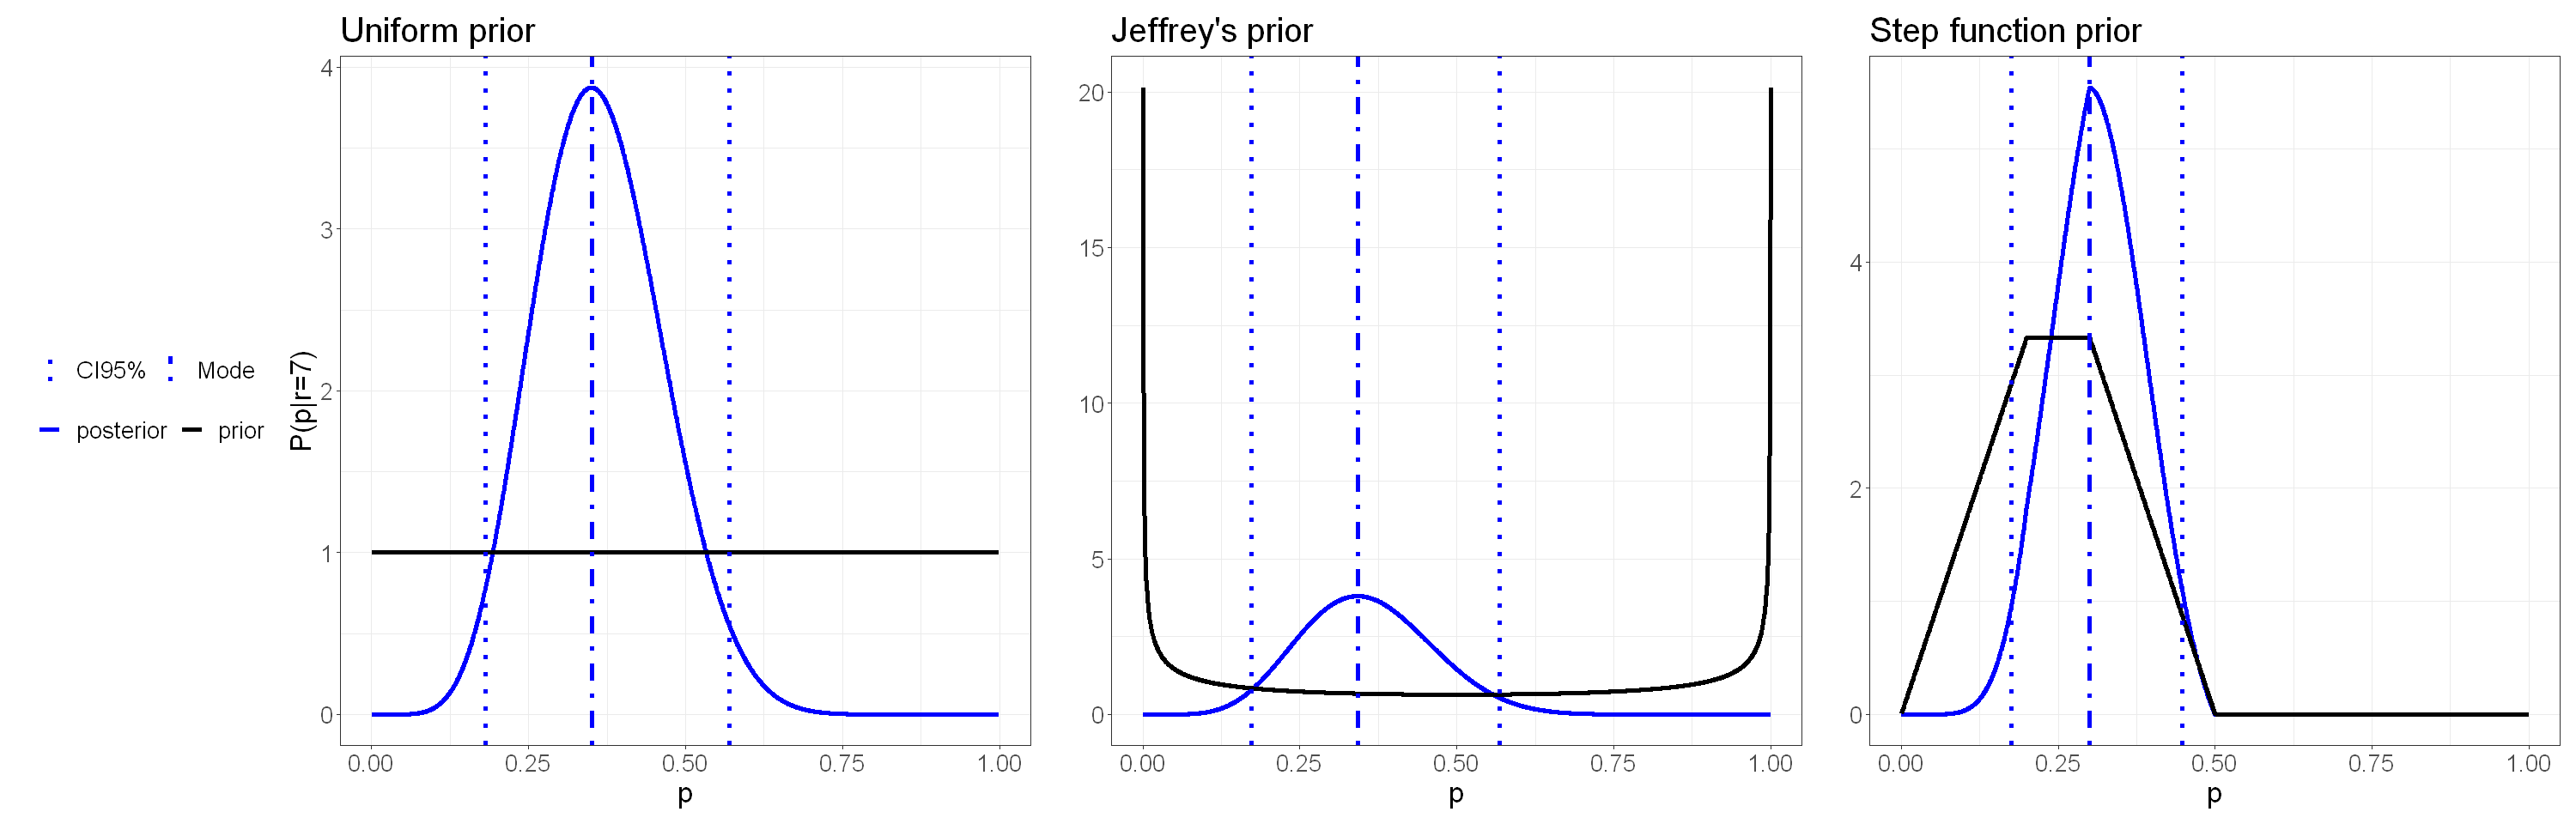

In [7]:
cols = c('posterior' = "blue", 'prior' = "black")
lintp = c('CI95%' = 3, 'Mode' = 4)
p1 <- ggplot() + theme_bw() + geom_line(aes(x = p, y = ex1_values$post_unif, colour = 'posterior'), linewidth = 1.5) + 
    geom_line(aes(x = p, y = ex1_values$prior_unif, colour = 'prior'), linewidth = 1.5) +
    geom_vline(aes(xintercept = ex1_res %>% filter(prior == 'unif') %>% pull(cin_l), linetype = 'CI95%'), 
            color = "blue", linewidth = 1.5) +
    geom_vline(aes(xintercept = ex1_res %>% filter(prior == 'unif') %>% pull(post_max), linetype = 'Mode'), 
            color = "blue", linewidth = 1.5) +
    geom_vline(aes(xintercept = ex1_res %>% filter(prior == 'unif') %>% pull(cin_u), linetype = 'CI95%'), 
            color = "blue", linewidth = 1.5) +
    scale_colour_manual(name = '', values = cols) +
    scale_linetype_manual(name = '', values = lintp) + 
    labs(x = 'p', y = 'P(p|r=7)', title = 'Uniform prior') + 
    theme(text = element_text(size = 20), legend.position = 'left', legend.direction = 'horizontal')

p2 <- ggplot() + theme_bw() + geom_line(aes(x = p, y = ex1_values$post_jeff), colour = 'blue', linewidth = 1.5) + 
    geom_line(aes(x = p, y = ex1_values$prior_jeff), colour = 'black', linewidth = 1.5) +
    geom_vline(xintercept = ex1_res %>% filter(prior == 'jeff') %>% select(cin_l, post_max, cin_u) %>% unlist(use.names = F), 
            linetype = c(3,4,3), color = "blue", linewidth  =1.5) +
    labs(x = 'p', y = '', title = 'Jeffrey\'s prior') + 
    theme(text = element_text(size = 20))

p3 <- ggplot() + theme_bw() + geom_line(aes(x = p, y = ex1_values$post_step), colour = 'blue', linewidth = 1.5) + 
    geom_line(aes(x = p, y = ex1_values$prior_step), colour = 'black', linewidth = 1.5) +
    geom_vline(xintercept = ex1_res %>% filter(prior == 'step') %>% select(cin_l, post_max, cin_u) %>% unlist(use.names = F), 
            linetype = c(3,4,3), color = "blue", linewidth  =1.5) +
    labs(x = 'p', y = '', title = 'Step function prior') + 
    theme(text = element_text(size = 20)) 

options(repr.plot.width = 25, repr.plot.height = 8)
p1 + p2 + p3 

# Exercise 2

Giardia cysts is a parassite that can contaminate food, water, and surfaces, and they can cause giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects. A group of researchers, working for a Human Health Department, work for determining the quality of stream water. They take $n=116$ samples of one-liter water from sites identified to have a heavy environmental impact from birds and waterflow. Out of these samples, $y=17$ samples contained Giard cystis.

Assuming $\pi$ as the probability that one-liter water sample contains Giardia cystis, find the posterio rdistribution for $\pi$ 
- assuming a uniform prior distribution
- assuming a Beta(1,4) prior

Plot the posterior distribution and summarize the results computing the first two moments.

Find a normal approximation for the posterior $g(\pi | y)$.

Compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table.

Add the limits on the plot of the posterior distributions.

In [8]:
r = 17
n = 116
n_samples = 2000
p = seq(from = 1 / (2 * n_samples), by = 1 / n_samples, length.out = n_samples)
ex2_res = tibble(post_max = numeric(), post_eval = numeric(), post_var = numeric(), g_sigma = numeric(), cin_l = numeric(), cin_u = numeric(), 
            g_cin_l = numeric(), g_cin_u = numeric(), prior = character())
ex2_values = tibble(post_unif = rep(0, n_samples))

Find posterior distribution for $\pi$ starting from a **uniform prior**.

In [9]:
p_star = dbinom(x = r, size = n, prob = p) * 1 # the * 1 is the prior
Z = sum(p_star) * (1 / n_samples)
post = p_star / Z
ex2_values = ex2_values %>% mutate(post_unif = post, prior_unif = rep(1, n_samples))

exp_val = sum(p * post) * (1 / n_samples)
variance = sum((p - exp_val) ** 2 * post) * (1 / n_samples)
cat('The expected value from the posterior is ', exp_val, ' while the variance is ', variance, sep = '')

lower = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.025)
upper = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.975)

# gaussian approximation with correspondent 95% CI interval
g_sigma = (1 / n) * sqrt((r / n) * (n - r))
max_post = p[which(post == max(post))]
g_lower = max_post - 2 * g_sigma
g_upper = max_post + 2 * g_sigma

ex2_res = ex2_res %>% add_row(post_max = max_post, post_eval = exp_val, post_var = variance, 
                       g_sigma = g_sigma, cin_l = lower[[2]], cin_u = upper[[2]], g_cin_l = g_lower, g_cin_u = g_upper, prior = 'unif')

The expected value from the posterior is 0.1525424 while the variance is 0.001086329

Find posterior distribution for $\pi$ starting from a **beta prior** with $\alpha = 1$ and $\beta = 4$.

In [10]:
lkl = dbinom(x = r, size = n, prob = p) # likelihood
alfa = 1
beta = 4
pr = dbeta(x = p, alfa, beta)
post = dbeta(x = p, alfa + r, beta + n - r)
ex2_values = ex2_values %>% mutate(post_jeff = post, prior_jeff = pr)

exp_val = sum(p * post) * (1 / n_samples)
variance = sum((p - exp_val) ** 2 * post) * (1 / n_samples)
cat('The expected value from the posterior is ', exp_val, ' while the variance is ', variance, sep = '')

lower = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.025)
upper = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.975)

# gaussian approximation with correspondent 95% CI interval
g_sigma = sqrt((r + alfa - 1) * (n - r + beta - 1) / (n + alfa + beta - 2) ** 3)
max_post = p[which(post == max(post))]
g_lower = max_post - 2 * g_sigma
g_upper = max_post + 2 * g_sigma

ex2_res = ex2_res %>% add_row(post_max = max_post, post_eval = exp_val, post_var = variance, 
                       g_sigma = g_sigma, cin_l = lower[[2]], cin_u = upper[[2]], g_cin_l = g_lower, g_cin_u = g_upper, prior = 'beta')

The expected value from the posterior is 0.1487603 while the variance is 0.001037957

Show the summary table.

In [11]:
ex2_res

post_max,post_eval,post_var,g_sigma,cin_l,cin_u,g_cin_l,g_cin_u,prior
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.14675,0.1525424,0.001086329,0.03283636,0.09425,0.22275,0.08107727,0.2124227,unif
0.14275,0.1487603,0.001037957,0.03207777,0.09175,0.21775,0.07859447,0.2069055,beta


Create the requred plots.

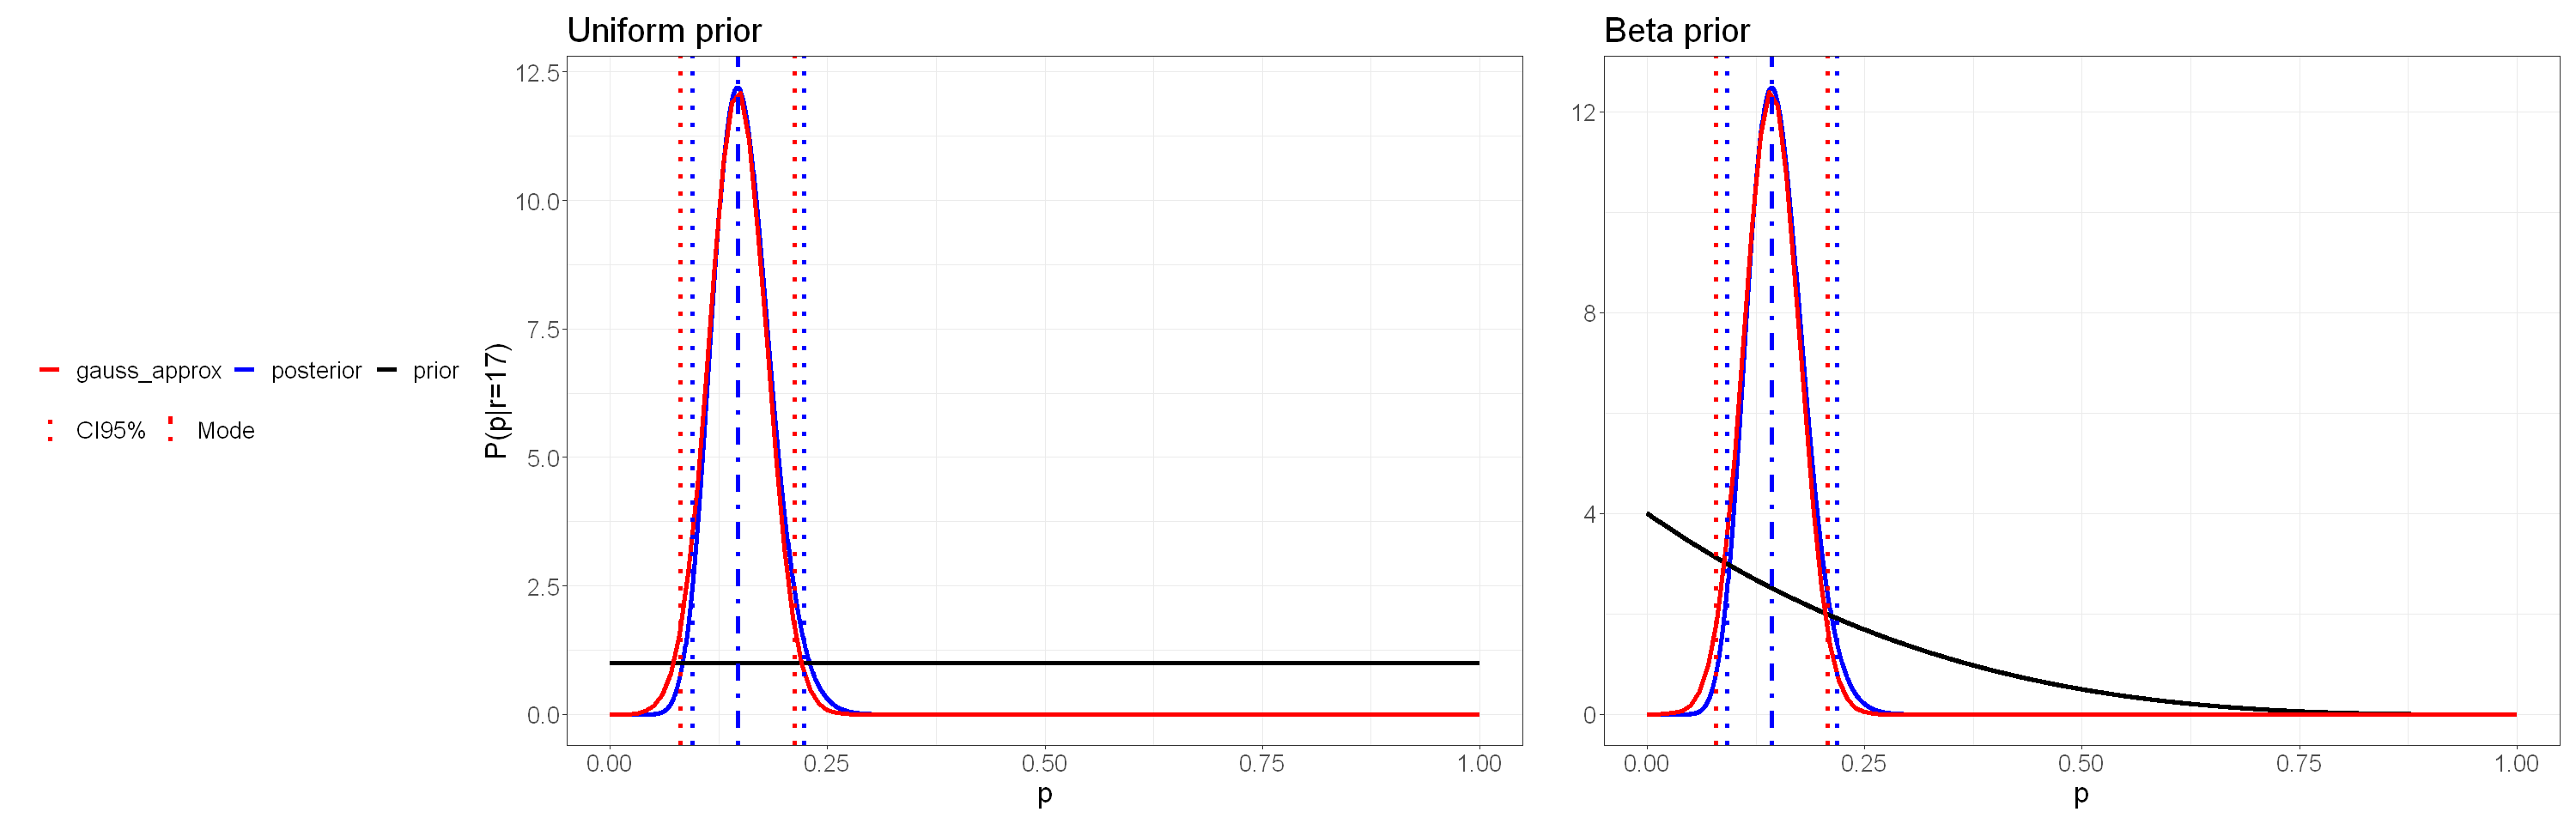

In [12]:
cols = c('posterior' = "blue", 'prior' = "black", 'gauss_approx' = 'red')
lintp = c('CI95%' = 3, 'Mode' = 4)
p1 <- ggplot() + theme_bw() + geom_line(aes(x = p, y = ex2_values$post_unif, colour = 'posterior'), linewidth = 1.5) + 
        geom_line(aes(x = p, y = ex2_values$prior_unif, colour = 'prior'), linewidth = 1.5) +
        stat_function(aes(colour = 'gauss_approx'), 
                fun = dnorm, , linewidth = 1.5, args = list(mean = ex2_res %>% filter(prior == 'unif') %>% select(post_max) %>% pull(), 
                sd = ex2_res %>% filter(prior == 'unif') %>% select(g_sigma) %>% pull())) +
        geom_vline(aes(xintercept = ex2_res %>% filter(prior == 'unif') %>% pull(cin_l), linetype = 'CI95%'), 
                color = "blue", linewidth = 1.5) +
        geom_vline(aes(xintercept = ex2_res %>% filter(prior == 'unif') %>% pull(post_max), linetype = 'Mode'), 
                color = "blue", linewidth = 1.5) +
        geom_vline(aes(xintercept = ex2_res %>% filter(prior == 'unif') %>% pull(cin_u), linetype = 'CI95%'), 
                color = "blue", linewidth = 1.5) +
        geom_vline(aes(xintercept = ex2_res %>% filter(prior == 'unif') %>% pull(g_cin_l), linetype = 'CI95%'), 
                color = "red", linewidth = 1.5) +
        geom_vline(aes(xintercept = ex2_res %>% filter(prior == 'unif') %>% pull(g_cin_u), linetype = 'CI95%'), 
                color = "red", linewidth = 1.5) +
        scale_colour_manual(name = '', values = cols) +
        scale_linetype_manual(name = '', values = lintp) +
        labs(x = 'p', y = 'P(p|r=17)', title = 'Uniform prior') + 
        theme(text = element_text(size = 20), legend.position = 'left', legend.direction = 'horizontal')

p2 <- ggplot() + theme_bw() + geom_line(aes(x = p, y = ex2_values$post_jeff), colour = 'blue', linewidth = 1.5) + 
    geom_line(aes(x = p, y = ex2_values$prior_jeff), colour = 'black', linewidth = 1.5) +
    stat_function(fun = dnorm, args = list(mean = ex2_res %>% filter(prior == 'beta') %>% select(post_max) %>% pull(), 
                                            sd = ex2_res %>% filter(prior == 'beta') %>% select(g_sigma) %>% pull()), colour = 'red', linewidth = 1.5) +
    geom_vline(xintercept = ex2_res %>% filter(prior == 'beta') %>% select(cin_l, post_max, cin_u) %>% unlist(use.names = F), 
            linetype = c(3,4,3), color = "blue", linewidth  =1.5) +
    geom_vline(xintercept = ex2_res %>% filter(prior == 'beta') %>% select(g_cin_l, g_cin_u) %>% unlist(use.names = F), 
            linetype = c(3,3), color = "red", linewidth = 1.5) +
    labs(x = 'p', y = '', title = 'Beta prior') + 
    theme(text = element_text(size = 20))

options(repr.plot.width = 25, repr.plot.height = 8)
p1 + p2

# Exercise 3

A coin is flipped $n=30$ times with the following outcomes:

```T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H```

- Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.
- Evaluate the most probable value for the coin probability $p$ and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.
- Repeat the same analysis assuming a sequential analysis of the data1. Show how the most probablevalue and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).
- Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

In [13]:
r = 15
n = 30
n_samples = 2000
p = seq(from = 1 / (2 * n_samples), by = 1 / n_samples, length.out = n_samples)
ex3_res = tibble(post_max = numeric(), post_eval = numeric(), post_var = numeric(), cin_l = numeric(), cin_u = numeric(), prior = character())
ex3_values = tibble(post_unif = rep(0, n_samples))

Find likelihood and posterior distributions for thedata set assuming an **uniform prior**.

In [14]:
p_star = dbinom(x = r, size = n, prob = p) * 1 # the * 1 is the prior
Z = sum(p_star) * (1 / n_samples)
post = p_star / Z
ex3_values = ex3_values %>% mutate(post_unif = post, prior_unif = rep(1, n_samples), lkl_unif = p_star)

exp_val = sum(p * post) * (1 / n_samples)
variance = sum((p - exp_val) ** 2 * post) * (1 / n_samples)
cat('The expected value from the posterior is ', exp_val, ' while the variance is ', variance, sep = '')

lower = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.025)
upper = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.975)

max_post = p[which(post == max(post))]
max_post = mean(max_post)

ex3_res = ex3_res %>% add_row(post_max = max_post, post_eval = exp_val, post_var = variance, 
                            cin_l = lower[[2]], cin_u = upper[[2]], prior = 'unif')

The expected value from the posterior is 0.5 while the variance is 0.007575758

Find likelihood and posterior distributions for thedata set assuming a **beta prior** with $\alpha = 10$ and $\beta = 10$.

In [15]:
lkl = dbinom(x = r, size = n, prob = p) # likelihood
alfa = 10
beta = 10
pr = dbeta(x = p, alfa, beta)
post = dbeta(x = p, alfa + r, beta + n - r)
ex3_values = ex3_values %>% mutate(post_beta = post, prior_beta = pr, lkl_beta = lkl)

exp_val = sum(p * post) * (1 / n_samples)
variance = sum((p - exp_val) ** 2 * post) * (1 / n_samples)
cat('The expected value from the posterior is ', exp_val, ' while the variance is ', variance, sep = '')

lower = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.025)
upper = dist_numintegrate(x = p, dist = post, space = 1 / n_samples, val = 0.975)

max_post = p[which(post == max(post))]
max_post = mean(max_post)

ex3_res = ex3_res %>% add_row(post_max = max_post, post_eval = exp_val, post_var = variance, 
                            cin_l = lower[[2]], cin_u = upper[[2]], prior = 'beta')

The expected value from the posterior is 0.5 while the variance is 0.004901961

Show summary table.

In [16]:
ex3_res

post_max,post_eval,post_var,cin_l,cin_u,prior
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.5,0.5,0.007575758,0.33125,0.66975,unif
0.5,0.5,0.004901961,0.36375,0.63725,beta


Create required plots.

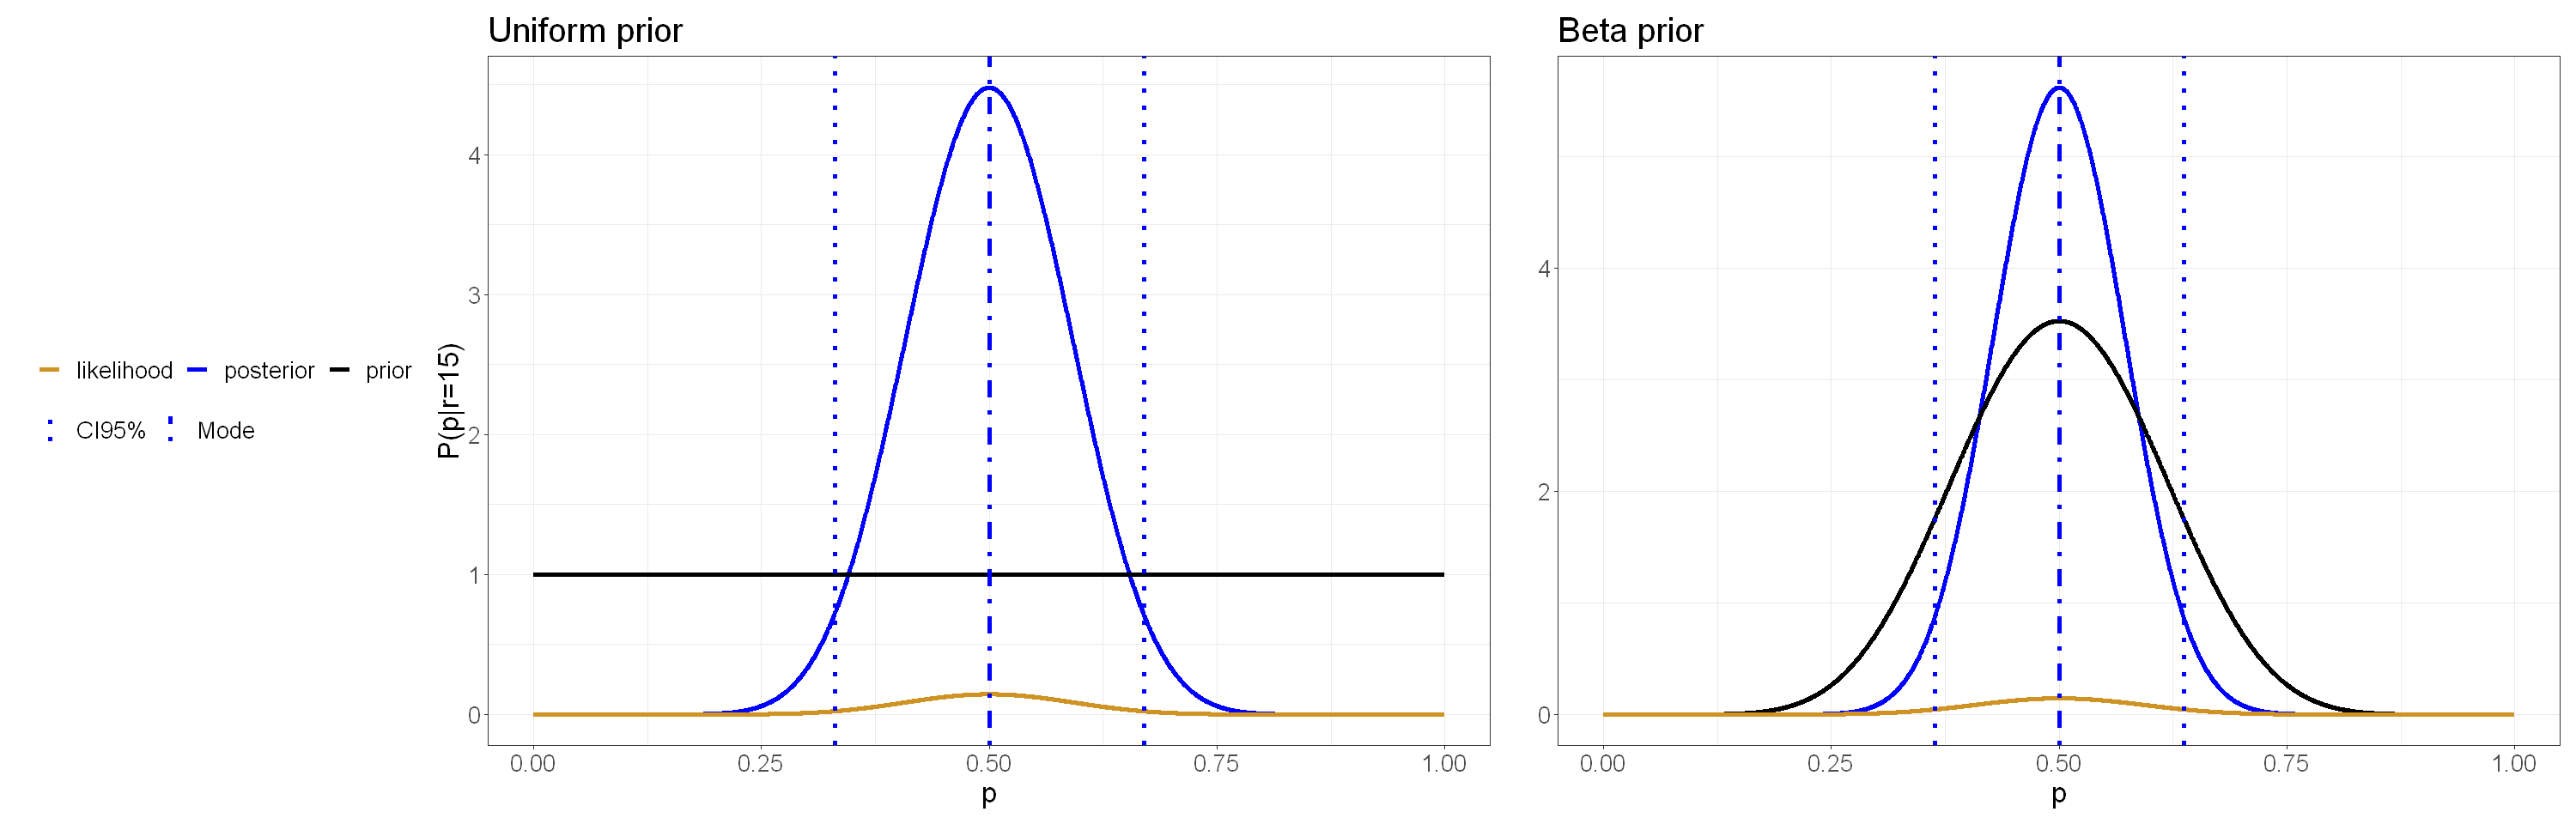

In [17]:
cols = c('posterior' = "blue", 'prior' = "black", 'likelihood' = '#cf9324')
lintp = c('CI95%' = 3, 'Mode' = 4)
p1 <- ggplot() + theme_bw() + geom_line(aes(x = p, y = ex3_values$post_unif, colour = 'posterior'), linewidth = 1.5) + 
    geom_line(aes(x = p, y = ex3_values$prior_unif, colour = 'prior'), linewidth = 1.5) +
    geom_line(aes(x = p, y = ex3_values$lkl_unif, colour = 'likelihood'), linewidth = 1.5) +
    geom_vline(aes(xintercept = ex3_res %>% filter(prior == 'unif') %>% pull(cin_l), linetype = 'CI95%'), 
            color = "blue", linewidth = 1.5) +
    geom_vline(aes(xintercept = ex3_res %>% filter(prior == 'unif') %>% pull(post_max), linetype = 'Mode'), 
            color = "blue", linewidth = 1.5) +
    geom_vline(aes(xintercept = ex3_res %>% filter(prior == 'unif') %>% pull(cin_u), linetype = 'CI95%'), 
            color = "blue", linewidth = 1.5) +
    scale_colour_manual(name = '', values = cols) +
    scale_linetype_manual(name = '', values = lintp) + 
    labs(x = 'p', y = 'P(p|r=15)', title = 'Uniform prior') + 
    theme(text = element_text(size = 20), legend.position = 'left', legend.direction = 'horizontal')

p2 <- ggplot() + theme_bw() + geom_line(aes(x = p, y = ex3_values$post_beta), colour = 'blue', linewidth = 1.5) + 
    geom_line(aes(x = p, y = ex3_values$prior_beta), colour = 'black', linewidth = 1.5) +
    geom_line(aes(x = p, y = ex3_values$lkl_beta), colour = '#cf9324', linewidth = 1.5) +
    geom_vline(xintercept = ex3_res %>% filter(prior == 'beta') %>% select(cin_l, post_max, cin_u) %>% unlist(use.names = F), 
            linetype = c(3,4,3), color = "blue", linewidth  =1.5) +
    labs(x = 'p', y = '', title = 'Beta prior') + 
    theme(text = element_text(size = 20))

options(repr.plot.width = 25, repr.plot.height = 8)
p1 + p2

Perform sequential analysis, usign each step the previous posterior as a prior.

In [18]:
tosses = c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')

r = 0
alfa_seq = numeric(length(tosses))
alfa_seq[[1]] = alfa
beta_seq = numeric(length(tosses))
beta_seq[[1]] = beta
ex3_seq_history = tibble(step = numeric(), cin_l_unif = numeric(), 
                        cin_u_unif = numeric(), mode_unif = numeric(), 
                        cin_l_beta = numeric(), cin_u_beta = numeric(), 
                        mode_beta = numeric())
n = 0
plots = list()

ex3_seq_values = tibble(prior_unif = rep(1, n_samples))

i = 1
for (toss in tosses) {
    n = n + 1
    if (toss == 'H') {
        r = r + 1
    }

    ex3_seq_res = tibble(unif_post_max = numeric(), beta_post_max = numeric(), 
                        cin_l_unif = numeric(), cin_u_unif = numeric(), 
                        cin_l_beta = numeric(), cin_u_beta = numeric())
                        
    if (i > 1)
    {
        ex3_seq_values = ex3_seq_values %>% mutate(prior_unif = post_unif) %>% mutate(prior_beta = post_beta)
    }    
    
    

    if (i == 1)
    {
        p_star = dbinom(x = r, size = n, prob = p) * 1 # the * 1 is the prior
        Z = sum(p_star) * (1 / n_samples)
        post = p_star / Z
        ex3_seq_values = ex3_seq_values %>% mutate(post_unif = post)
    }
    else {
       lkl = dbinom(x = r, size = n, prob = p)
       pr = ex3_seq_values$prior_unif
       p_star = lkl * pr
       Z = sum(p_star) * (1 / n_samples)
       post = p_star / Z
       ex3_seq_values = ex3_seq_values %>% mutate(post_unif = post)
    }

    
    lower_unif = dist_numintegrate(x = p, dist = ex3_seq_values$post_unif, space = 1 / n_samples, val = 0.025)
    upper_unif = dist_numintegrate(x = p, dist = ex3_seq_values$post_unif, space = 1 / n_samples, val = 0.975)
    mode_unif = p[which(ex3_seq_values$post_unif == max(ex3_seq_values$post_unif))]
    mode_unif = mean(mode_unif)



    pr = dbeta(x = p, alfa_seq[[i]], beta_seq[[i]])
    post = dbeta(x = p, alfa_seq[[i]] + r, beta_seq[[i]] + n - r)
    if (i != length(tosses)) {
        alfa_seq[[i+1]] = alfa_seq[[i]] + r
        beta_seq[[i+1]] = beta_seq[[i]] + n - r
    }

    ex3_seq_values = ex3_seq_values %>% mutate(prior_beta = pr) %>% mutate(post_beta = post)

    lower_beta = dist_numintegrate(x = p, dist = ex3_seq_values$post_beta, space = 1 / n_samples, val = 0.025)
    upper_beta = dist_numintegrate(x = p, dist = ex3_seq_values$post_beta, space = 1 / n_samples, val = 0.975)
    mode_beta = p[which(ex3_seq_values$post_beta == max(ex3_seq_values$post_beta))]
    mode_beta = mean(mode_beta)

    ex3_seq_res = ex3_seq_res %>% add_row(unif_post_max = mode_unif, beta_post_max = mode_beta, 
                                cin_l_unif = lower_unif[[2]], cin_u_unif = upper_unif[[2]], 
                                cin_l_beta = lower_beta[[2]], cin_u_beta = upper_beta[[2]])

    ex3_seq_history = ex3_seq_history %>% add_row(step = i, mode_unif = mode_unif, mode_beta = mode_beta, 
                                cin_l_unif = lower_unif[[2]], cin_u_unif = upper_unif[[2]], 
                                cin_l_beta = lower_beta[[2]], cin_u_beta = upper_beta[[2]])


    plots[[i]] = ggplot() + theme_bw() + geom_line(data = ex3_seq_values, aes(x = p, y = post_unif), colour = 'blue', linewidth = 1.5) + 
    geom_line(data = ex3_seq_values, aes(x = p, y = post_beta), colour = 'red', linewidth = 1.5) +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_l_unif), 
            linetype = 3, color = "blue", linewidth = 1.5) +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_l_beta), 
            linetype = 3, color = "red", linewidth = 1.5) +
    geom_vline(data = ex3_seq_res, aes(xintercept = unif_post_max), 
            linetype = 4, color = "blue", linewidth = 1.5) +
    geom_vline(data = ex3_seq_res, aes(xintercept = beta_post_max), 
            linetype = 4, color = "red", linewidth = 1.5) +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_u_unif), 
            linetype = 3, color = "blue", linewidth = 1.5) +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_u_beta), 
            linetype = 3, color = "red", linewidth = 1.5) +
    labs(x = 'p', y = 'd prob/dp', title = paste('n = ', n, '    r = ', r, sep = '')) + 
    theme(text = element_text(size = 20))
    i = i + 1
}

Create gridplot with posterior PDFs plotted at each step:
- red posteriors are those derived starting from the uniform prior
- blue posteriors are those derived starting from the Beta(10,10) prior

Warning message:
"il pacchetto 'gridExtra' è stato creato con R versione 4.2.3"

Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




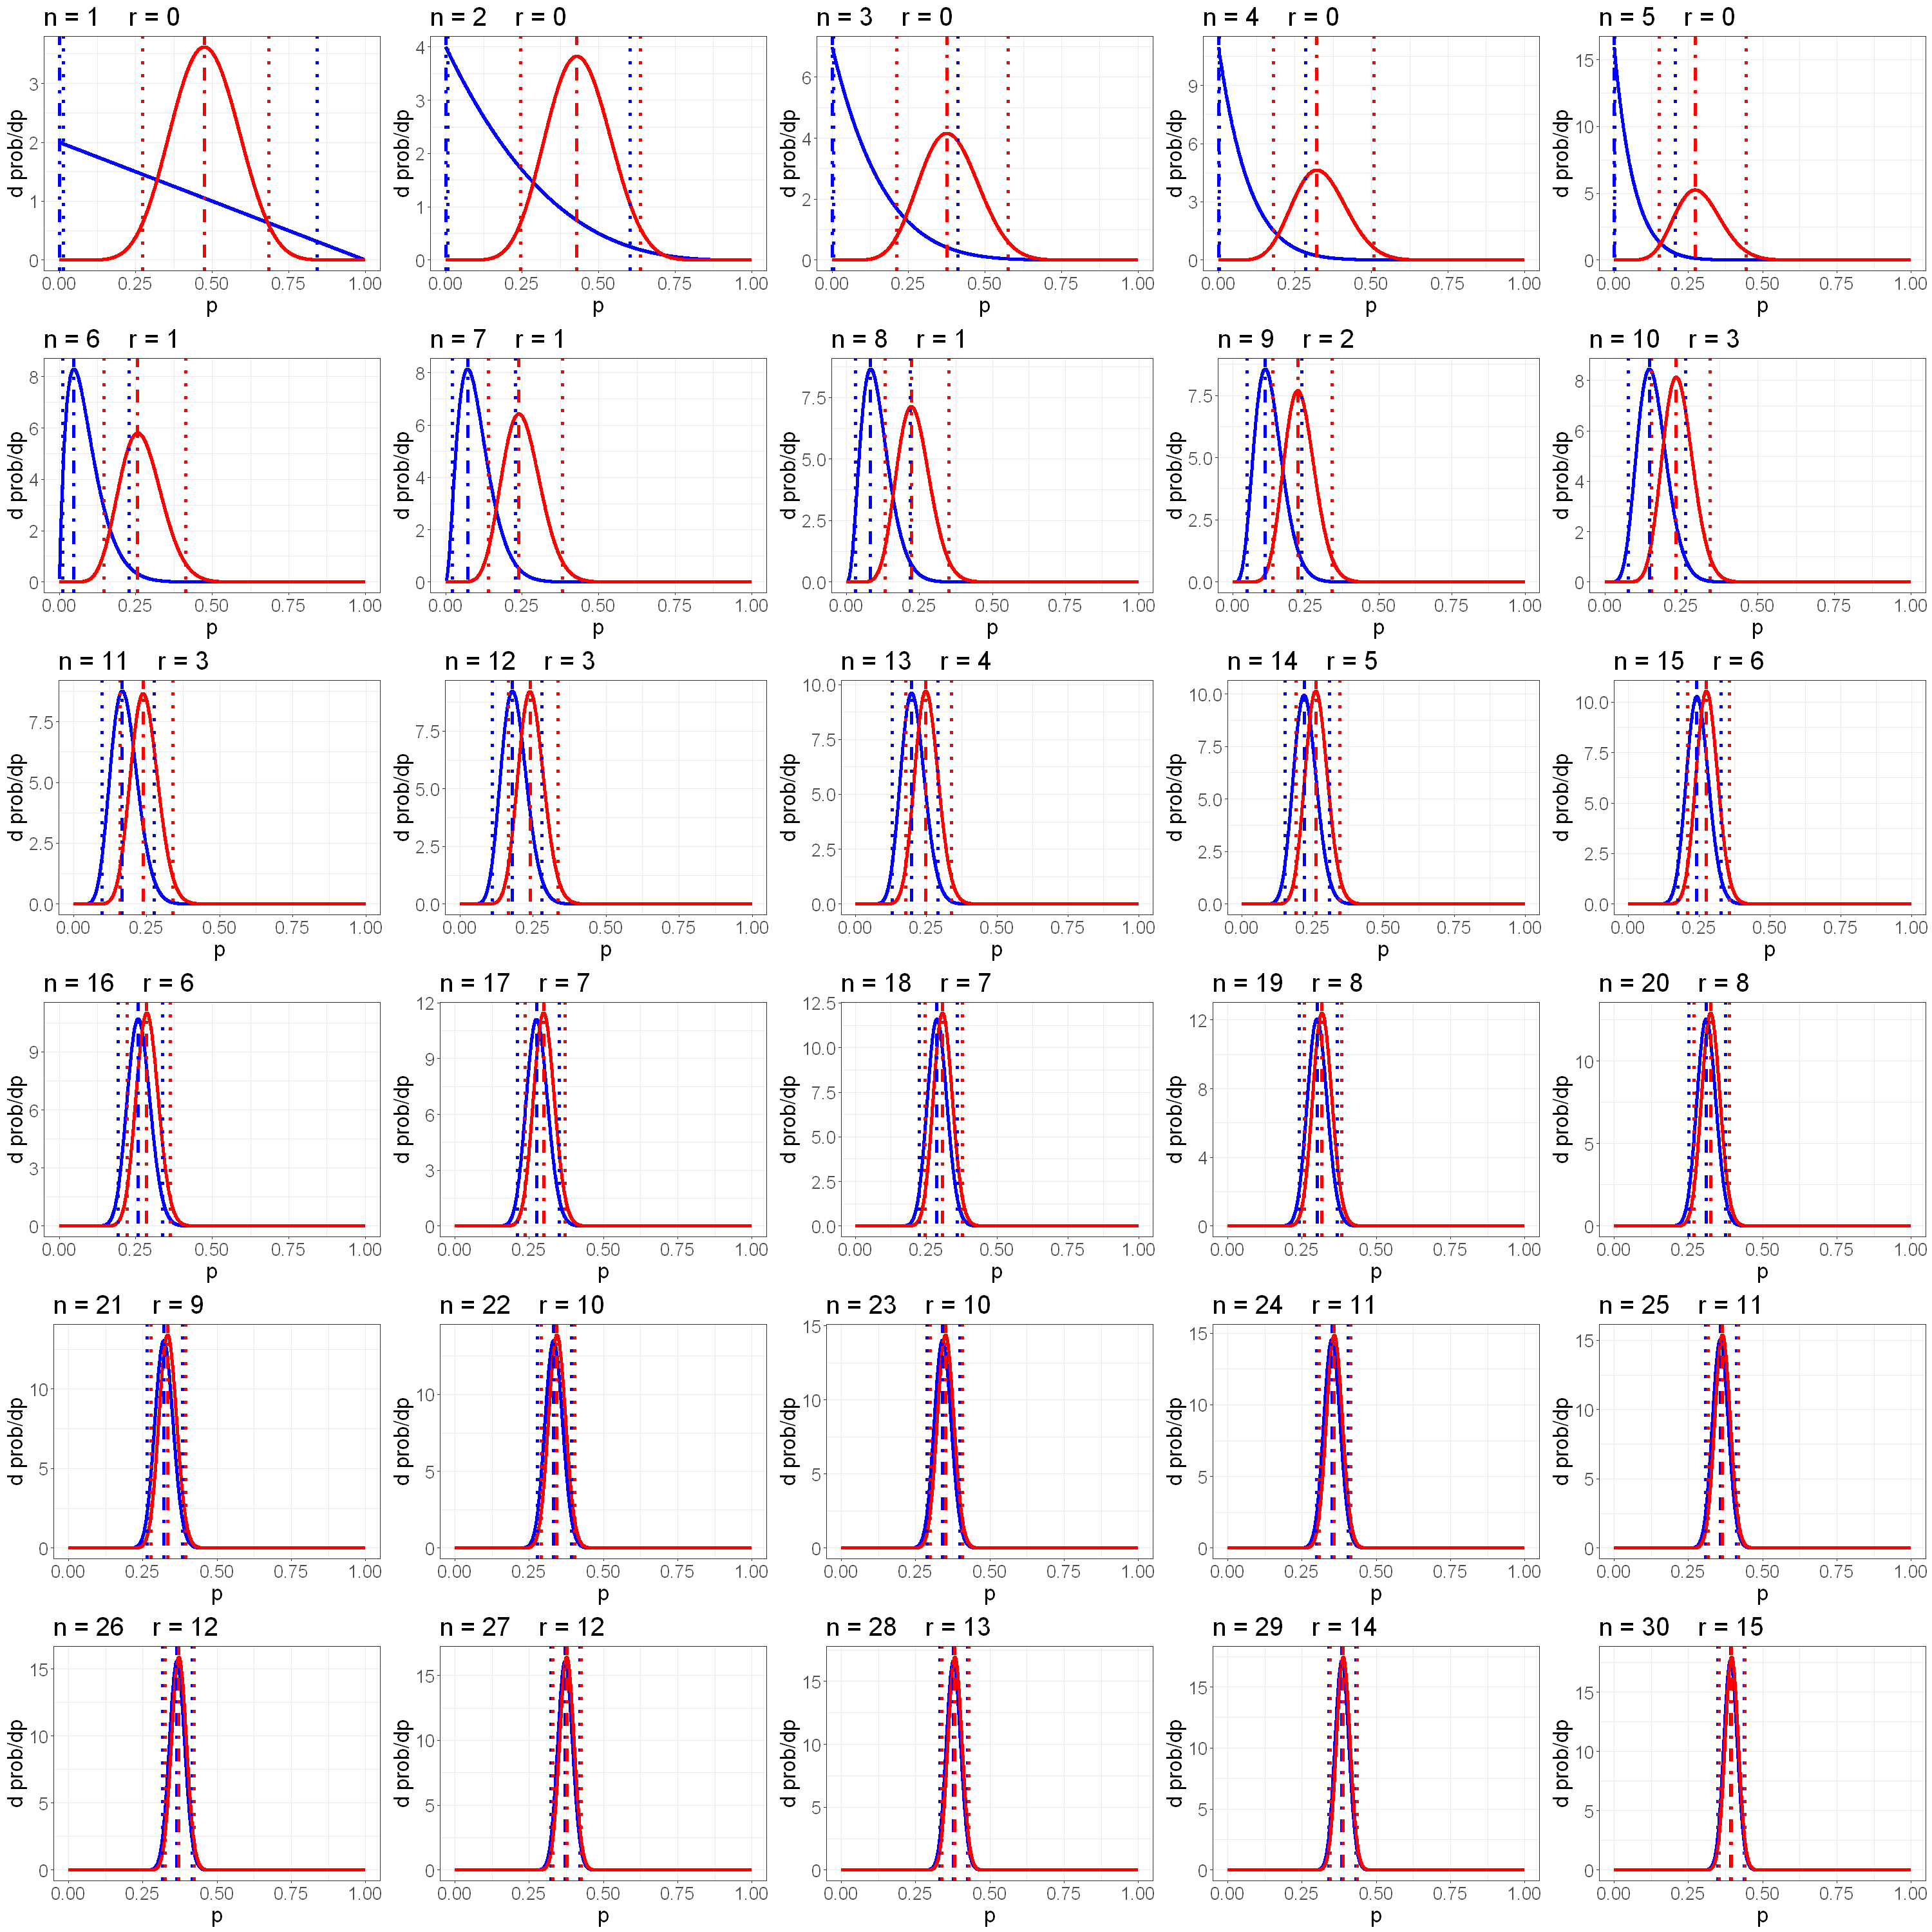

In [19]:
library(gridExtra)
options(repr.plot.width = 25, repr.plot.height = 25)
grid.arrange(grobs = plots, ncol = 5)

Compare sequential and one-step analysis.

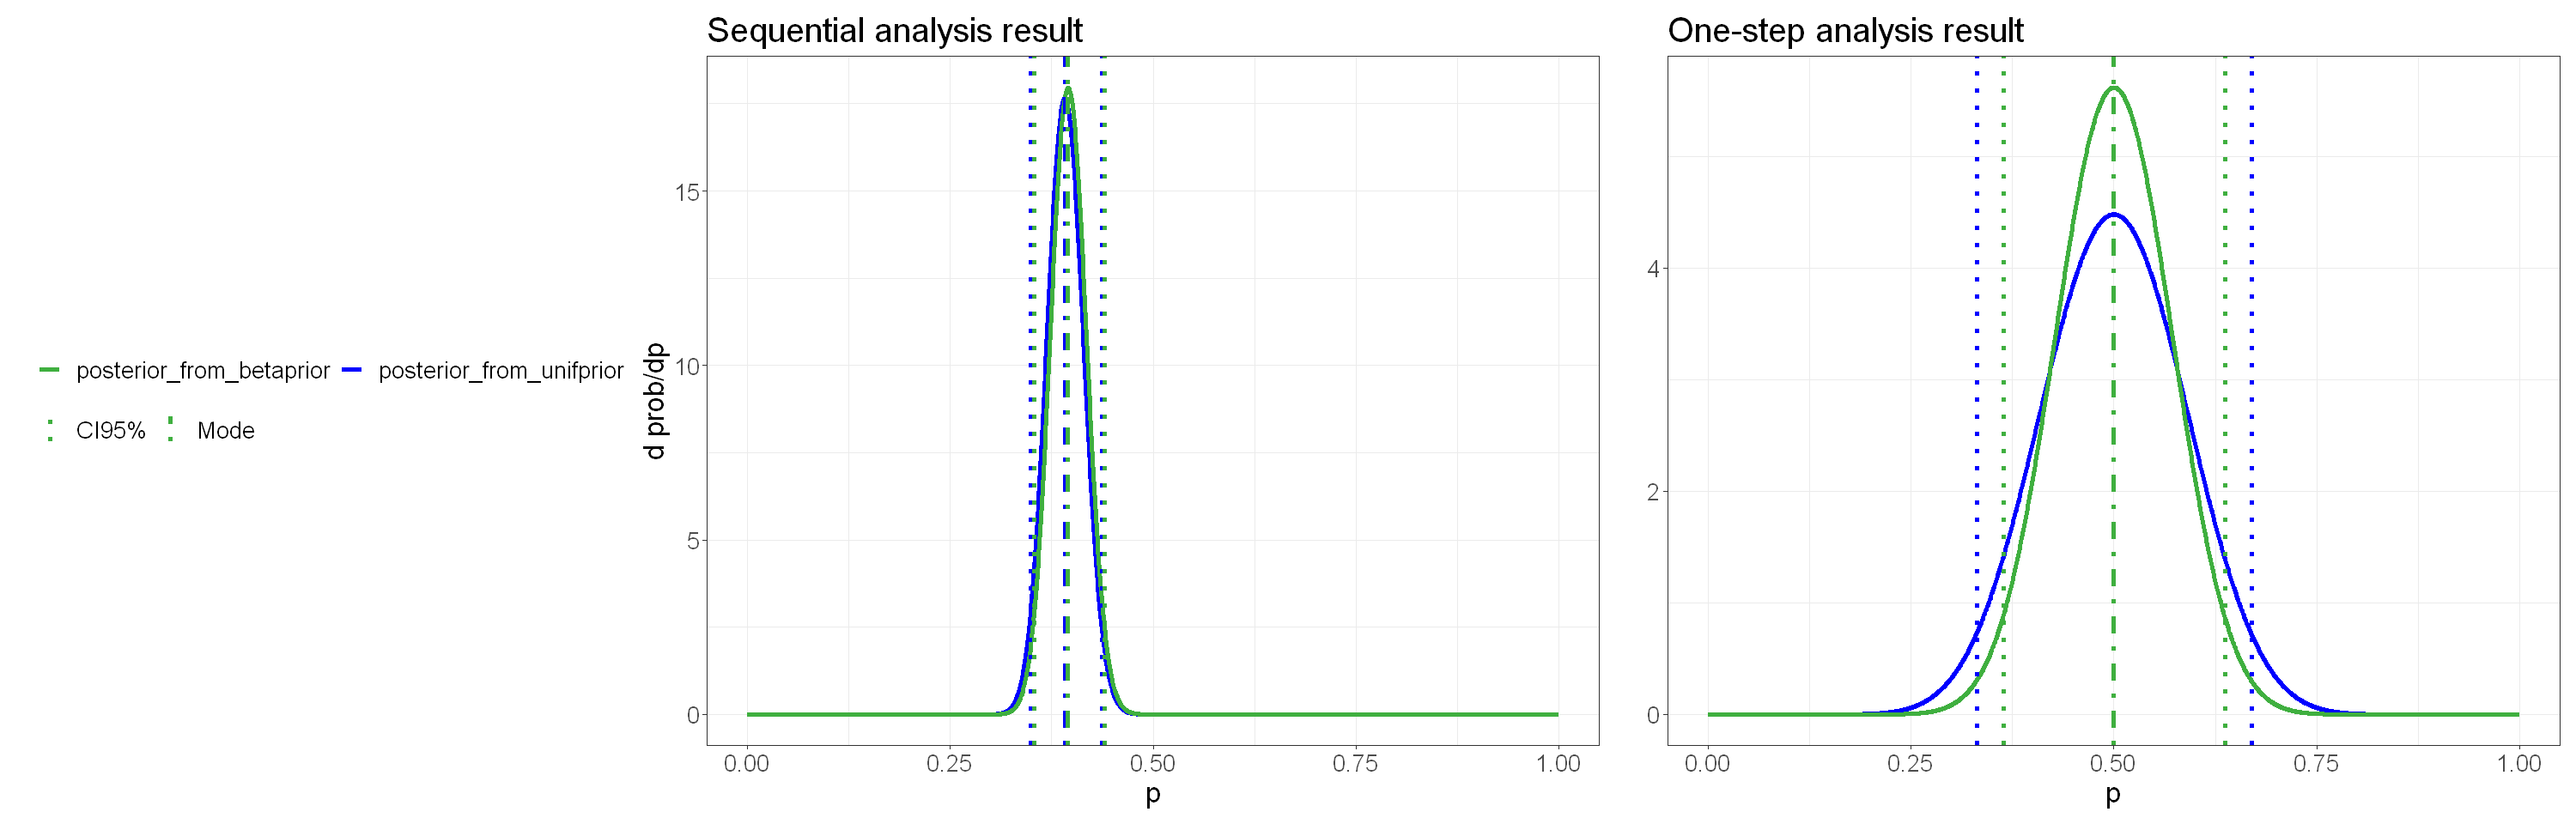

In [20]:
cols = c('posterior_from_unifprior' = "blue", 'posterior_from_betaprior' = "#3faf3f")
lintp = c('CI95%' = 3, 'Mode' = 4)

p1 = ggplot() + theme_bw() + geom_line(data = ex3_seq_values, aes(x = p, y = post_unif, colour = 'posterior_from_unifprior'), linewidth = 1.5) + 
    geom_line(data = ex3_seq_values, aes(x = p, y = post_beta, colour = 'posterior_from_betaprior'), linewidth = 1.5) +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_l_unif, 
            linetype = 'CI95%'), linewidth = 1.5, color = "blue") +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_l_beta, 
            linetype = 'CI95%'), linewidth = 1.5, color = "#3faf3f") +
    geom_vline(data = ex3_seq_res, aes(xintercept = unif_post_max, 
            linetype = 'Mode'), linewidth = 1.5, color = "blue") +
    geom_vline(data = ex3_seq_res, aes(xintercept = beta_post_max, 
            linetype = 'Mode'), linewidth = 1.5, color = "#3faf3f") +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_u_unif, 
            linetype = 'CI95%'), linewidth = 1.5, color = "blue") +
    geom_vline(data = ex3_seq_res, aes(xintercept = cin_u_beta, 
            linetype = 'CI95%'), linewidth = 1.5, color = "#3faf3f") +
            scale_colour_manual(name = '', values = cols) +
    scale_linetype_manual(name = '', values = lintp) + 
    labs(x = 'p', y = 'd prob/dp', title = 'Sequential analysis result') + 
    theme(text = element_text(size = 20), legend.position = 'left', legend.direction = 'horizontal')

p2 = ggplot() + theme_bw() + geom_line(aes(x = p, y = ex3_values$post_unif), linewidth = 1.5, colour = 'blue') + 
    geom_line(aes(x = p, y = ex3_values$post_beta), linewidth = 1.5, colour = '#3faf3f') +
    geom_vline(xintercept = ex3_res %>% filter(prior == 'unif') %>% select(cin_l, post_max, cin_u) %>% unlist(use.names = F), 
            linetype = c(3,4,3), color = "blue", linewidth = 1.5) +
    geom_vline(xintercept = ex3_res %>% filter(prior == 'beta') %>% select(cin_l, post_max, cin_u) %>% unlist(use.names = F), 
            linetype = c(3,4,3), color = "#3faf3f", linewidth  =1.5) +
    labs(x = 'p', y = '', title = 'One-step analysis result') + 
    theme(text = element_text(size = 20))



options(repr.plot.width = 25, repr.plot.height = 8)
p1 + p2

As shown in the following plots, it is possible to see that the sequential and the one-step analysis do not lead to the same results.

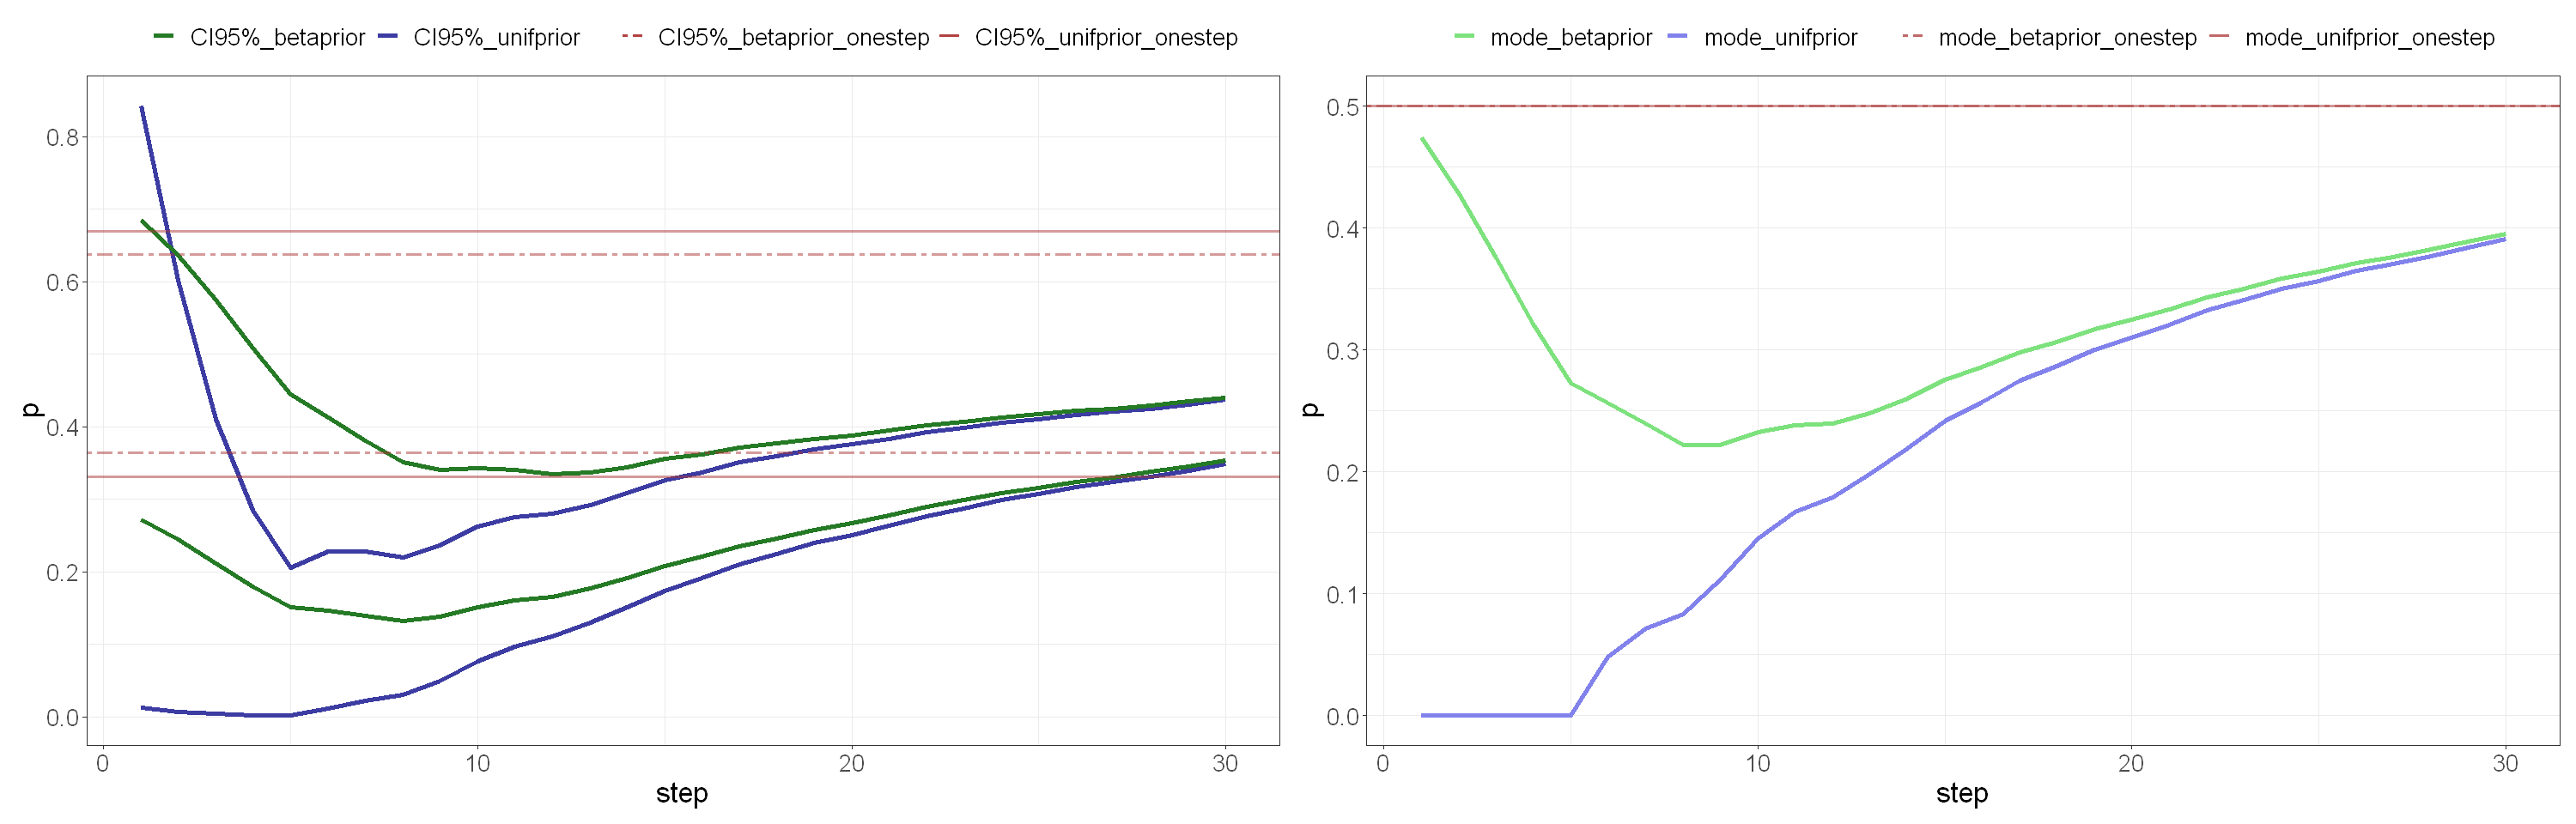

In [21]:
cols = c('CI95%_unifprior' = "#3c3ca3", 'CI95%_betaprior' = "#257a25", 'mode_unifprior' = '#8282ec', 'mode_betaprior' = '#7de27d')
lintp = c('CI95%_unifprior_onestep' = 'solid', 'CI95%_betaprior_onestep' = 'twodash')
p1 =  ggplot(data = ex3_seq_history) + geom_line(aes(x = step, y = cin_l_unif, col = 'CI95%_unifprior'), linewidth = 1.5) + 
        geom_line(aes(x = step, y = cin_u_unif, col = 'CI95%_unifprior'), linewidth = 1.5) + geom_line(aes(x = step, y = cin_l_beta, col = 'CI95%_betaprior'), linewidth = 1.5) +
        geom_line(aes(x = step, y = cin_u_beta, col = 'CI95%_betaprior'), linewidth = 1.5) + 
        geom_hline(aes(yintercept = ex3_res %>% filter(prior == 'unif') %>% pull(cin_l), linetype = 'CI95%_unifprior_onestep'), 
            color = "#ac3636", linewidth = 1.1, alpha = 0.5) +
        geom_hline(aes(yintercept = ex3_res %>% filter(prior == 'unif') %>% pull(cin_u), linetype = 'CI95%_unifprior_onestep'), 
            color = "#ac3636", linewidth = 1.1, alpha = 0.5) +
        geom_hline(aes(yintercept = ex3_res %>% filter(prior == 'beta') %>% pull(cin_l), linetype = 'CI95%_betaprior_onestep'), 
            color = "#ac3636", linewidth = 1.1, alpha = 0.5) +
        geom_hline(aes(yintercept = ex3_res %>% filter(prior == 'beta') %>% pull(cin_u), linetype = 'CI95%_betaprior_onestep'), 
            color = "#ac3636", linewidth = 1.1, alpha = 0.5) +
        scale_colour_manual(name = '', values = cols) +
        scale_linetype_manual(name = '', values = lintp) +
        labs(y = 'p') + 
        theme_bw() + 
        theme(text = element_text(size = 20), legend.position = 'top', legend.direction = 'horizontal')

lintp = c('mode_unifprior_onestep' = 'solid', 'mode_betaprior_onestep' = 'twodash')
p2 = ggplot(data = ex3_seq_history) + geom_line(aes(x = step, y = mode_unif, col = 'mode_unifprior'), linewidth = 1.5) +
        geom_line(aes(x = step, y = mode_beta, col = 'mode_betaprior'), linewidth = 1.5) + 
        geom_hline(aes(yintercept = ex3_res %>% filter(prior == 'unif') %>% pull(post_max), linetype = 'mode_unifprior_onestep'), 
            color = "#ac3636", linewidth = 1.1, alpha = 0.5) +
        geom_hline(aes(yintercept = ex3_res %>% filter(prior == 'unif') %>% pull(post_max), linetype = 'mode_betaprior_onestep'), 
            color = "#ac3636", linewidth = 1.1, alpha = 0.5) +
        scale_colour_manual(name = '', values = cols) + 
        scale_linetype_manual(name = '', values = lintp) +
        labs(y = 'p') + 
        theme_bw() + 
        theme(text = element_text(size = 20), legend.position = 'top', legend.direction = 'horizontal')

options(repr.plot.width = 25, repr.plot.height = 8)
p1 + p2

# Exercise 4 - Six Boxes Toy Model: inference

Write a program in R that performs a simulation of the process:
- after selecting a random box
- make random sampling from the box
- print on the standard output the probability of selecting each box
- plot the probability for each box as a function of the number of trial

In [22]:
n_box = sample(0:5, 1)
stones = case_when(n_box == 0 ~ rep('B', 5), 
                n_box == 1 ~ c('B', 'B', 'B', 'B', 'W'), 
                n_box == 2 ~ c('B', 'B', 'B', 'W', 'W'), 
                n_box == 3 ~ c('B', 'B', 'W', 'W', 'W'), 
                n_box == 4 ~ c('B', 'W', 'W', 'W', 'W'), 
                n_box == 5 ~ rep('W', 5))

cat('The model will be simulated using Box ', n_box, '\n', sep = '')

The model will be simulated using Box 4


Simulate model and store results in a tibble.

In [23]:
sb_toymodel = tibble(trial = numeric(), E = character(), 
                H0 = numeric(), H1 = numeric(), H2 = numeric(), H3 = numeric(), H4 = numeric(), H5 = numeric(), pW_cond = numeric())

pB_H = c(1, 4/5, 3/5, 2/5, 1/5, 0)
pW_H = 1 - pB_H
pH = rep(1/6, 6)
n_trials = 60

sb_toymodel = sb_toymodel %>% add_row(trial = 0, E = '-', H0 = pH[[1]], H1 = pH[[2]], H2 = pH[[3]], H3 = pH[[4]], H4 = pH[[5]], H5 = pH[[6]], pW_cond = 0.5)

for (i in 1:n_trials) {
    s = sample(stones, 1)
    
    if (s == 'B'){
        pH_B = (pB_H * pH) / sum(pB_H * pH)
        pH = pH_B
        pW_cond = 1 - sum(pB_H * pH)
        sb_toymodel = sb_toymodel %>% add_row(trial = i, E = s, H0 = pH[[1]], H1 = pH[[2]], H2 = pH[[3]], H3 = pH[[4]], H4 = pH[[5]], H5 = pH[[6]], pW_cond = pW_cond)
    }
    else {
        pH_W = (pW_H * pH) / sum(pW_H * pH)
        pH = pH_W
        pW_cond = sum(pW_H * pH)
        sb_toymodel = sb_toymodel %>% add_row(trial = i, E = s, H0 = pH[[1]], H1 = pH[[2]], H2 = pH[[3]], H3 = pH[[4]], H4 = pH[[5]], H5 = pH[[6]], pW_cond = pW_cond)
    }
}

Show head and tail of the results tibble.

In [24]:
head(sb_toymodel)
tail(sb_toymodel)

trial,E,H0,H1,H2,H3,H4,H5,pW_cond
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-,0.1666667,0.166666667,0.1666667,0.1666667,0.1666667,0.1666667,0.5000000
1,W,0.0000000,0.066666667,0.1333333,0.2000000,0.2666667,0.3333333,0.7333333
2,B,0.0000000,0.200000000,0.3000000,0.3000000,0.2000000,0.0000000,0.5000000
3,W,0.0000000,0.080000000,0.2400000,0.3600000,0.3200000,0.0000000,0.5840000
4,W,0.0000000,0.027397260,0.1643836,0.3698630,0.4383562,0.0000000,0.6438356
5,W,0.0000000,0.008510638,0.1021277,0.3446809,0.5446809,0.0000000,0.6851064


trial,E,H0,H1,H2,H3,H4,H5,pW_cond
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55,W,0,1.292407e-26,1.294902e-12,4.832378e-05,0.9999517,0,0.7999903
56,W,0,3.231057e-27,6.474586e-13,3.624327e-05,0.9999638,0,0.7999928
57,W,0,8.077716e-28,3.237322e-13,2.718270e-05,0.9999728,0,0.7999946
58,W,0,2.019443e-28,1.618672e-13,2.038716e-05,0.9999796,0,0.7999959
59,W,0,5.048633e-29,8.093402e-14,1.529045e-05,0.9999847,0,0.7999969
60,W,0,1.262163e-29,4.046717e-14,1.146788e-05,0.9999885,0,0.7999977


Plot the probability of each box as a function of the number of trials.

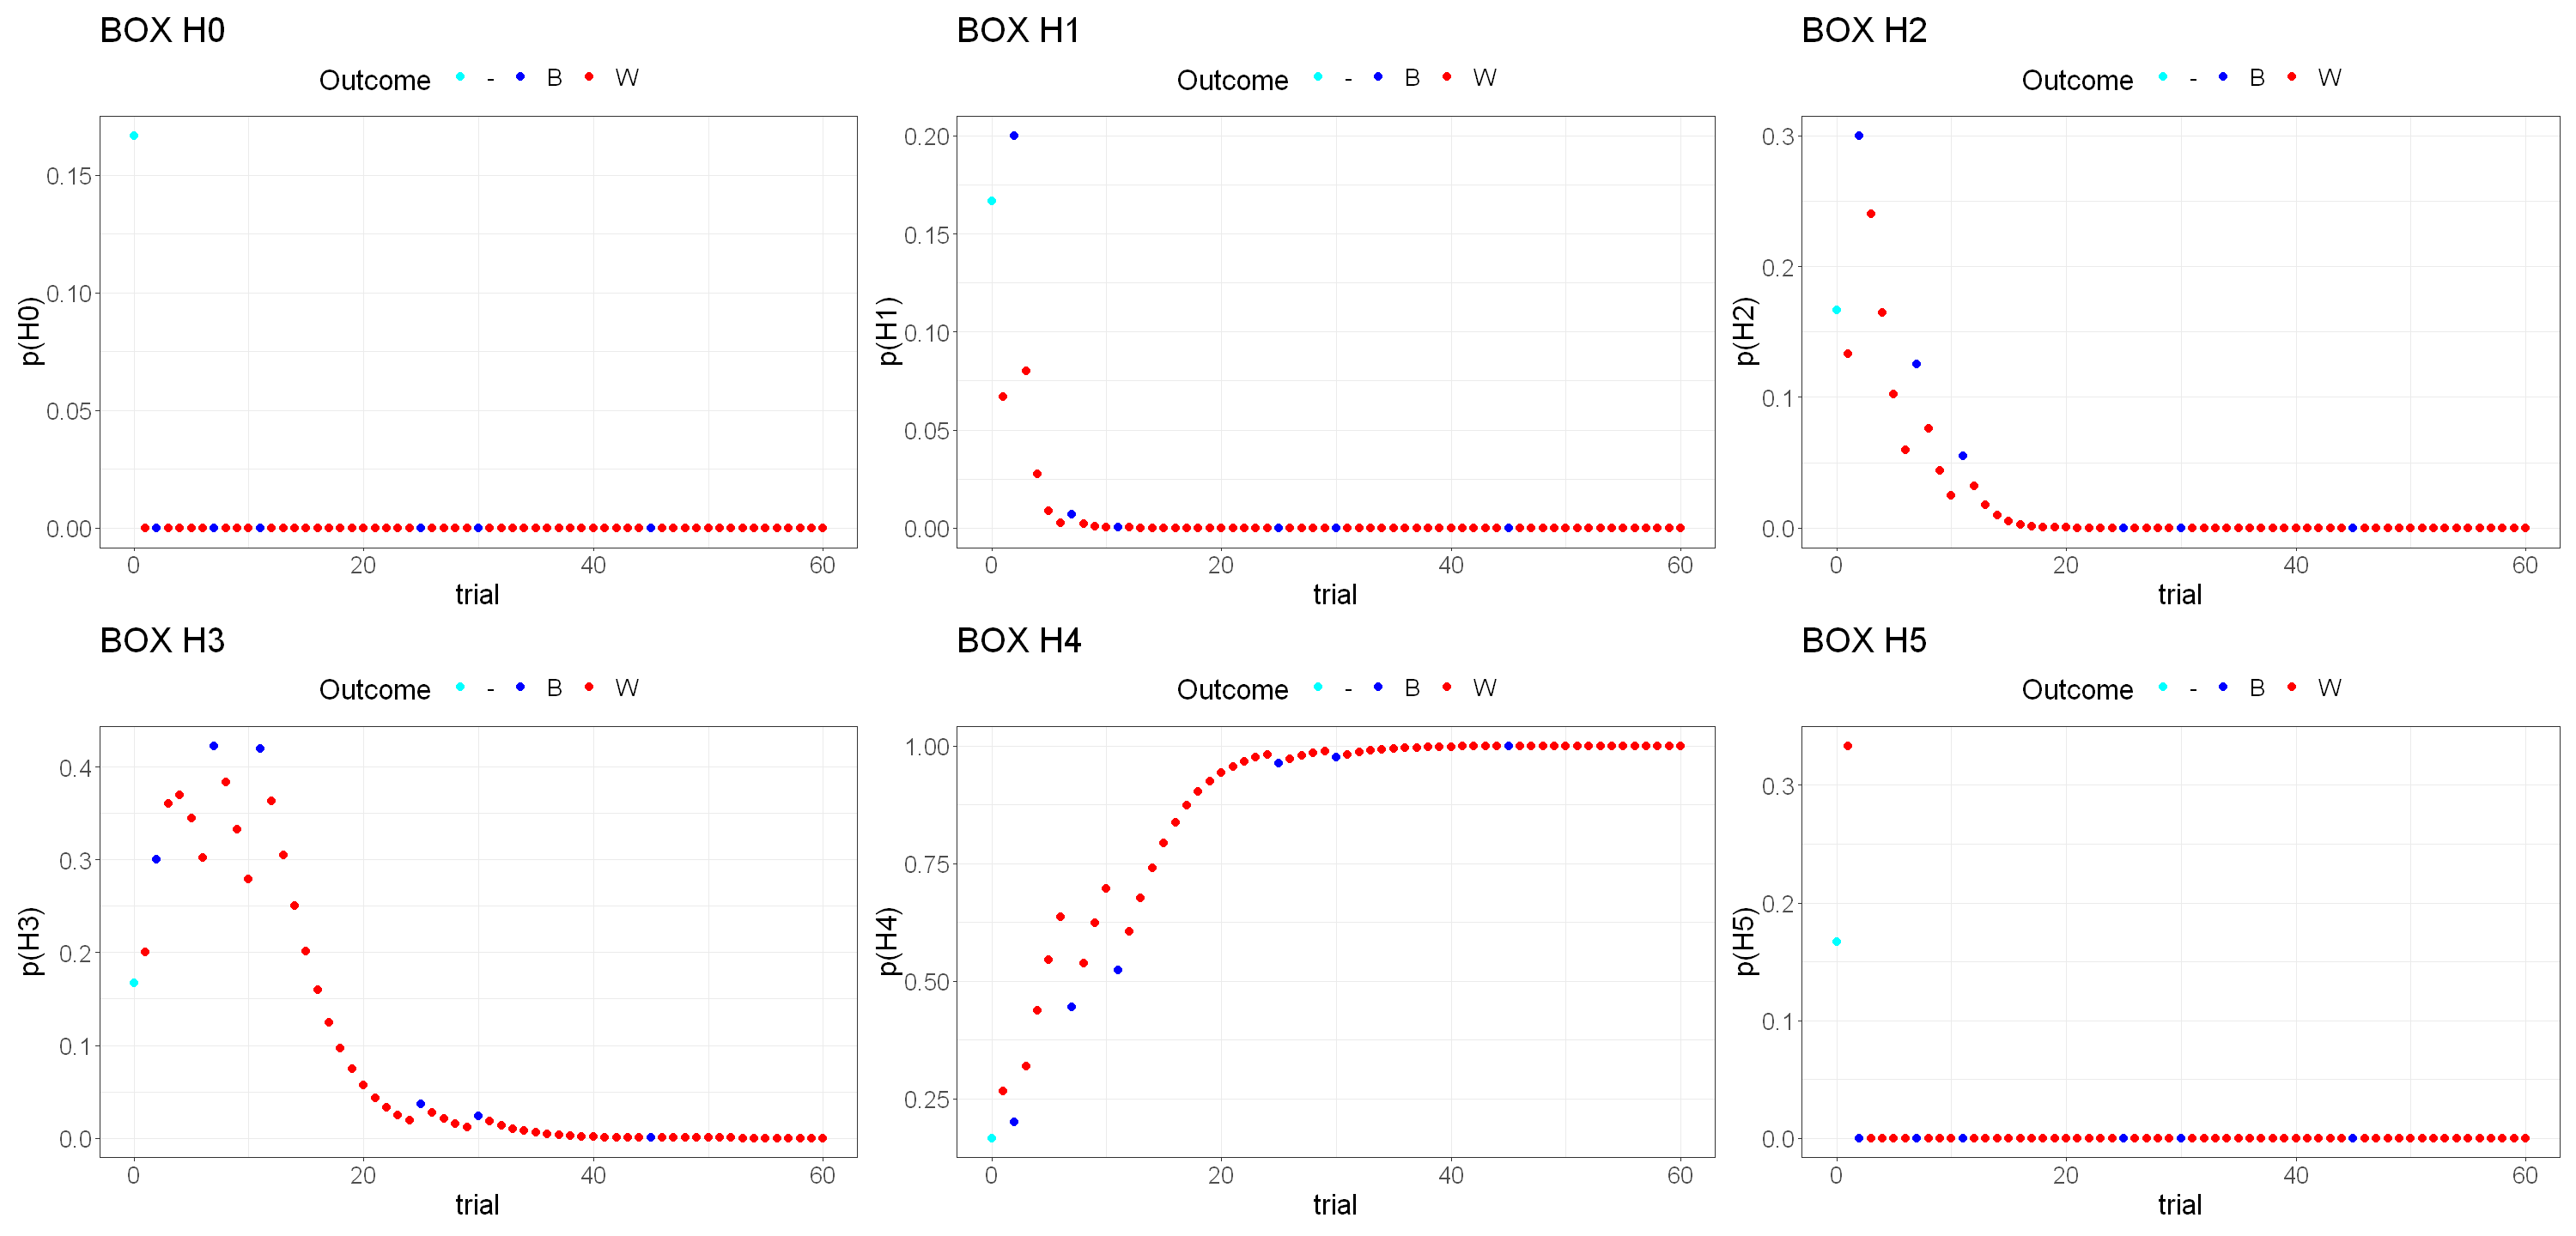

In [25]:
p0 = ggplot(data = sb_toymodel) + geom_point(aes(x = trial, y = H0, colour = E), size = 2.5) +
    theme_bw() + theme(text = element_text(size = 20), legend.position = 'top') +
    theme(text = element_text(size = 20), legend.position = 'top') +
    scale_color_manual(name = 'Outcome', labels = c('-', 'B', 'W'), values = c('cyan', 'blue', 'red')) +
    labs(y = 'p(H0)', title = 'BOX H0')
p1 = ggplot(data = sb_toymodel) + geom_point(aes(x = trial, y = H1, colour = E),size = 2.5) +
    theme_bw() + theme(text = element_text(size = 20), legend.position = 'top') +
    theme(text = element_text(size = 20), legend.position = 'top') +
    scale_color_manual(name = 'Outcome', labels = c('-', 'B', 'W'), values = c('cyan', 'blue', 'red')) +
    labs(y = 'p(H1)', title = 'BOX H1')
p2 = ggplot(data = sb_toymodel) + geom_point(aes(x = trial, y = H2, colour = E), size = 2.5) +
    theme_bw() + theme(text = element_text(size = 20), legend.position = 'top') +
    theme(text = element_text(size = 20), legend.position = 'top') +
    scale_color_manual(name = 'Outcome', labels = c('-', 'B', 'W'), values = c('cyan', 'blue', 'red')) +
    labs(y = 'p(H2)', title = 'BOX H2')
p3 = ggplot(data = sb_toymodel) + geom_point(aes(x = trial, y = H3, colour = E), size = 2.5) +
    theme_bw() + theme(text = element_text(size = 20), legend.position = 'top') +
    theme(text = element_text(size = 20), legend.position = 'top') +
    scale_color_manual(name = 'Outcome', labels = c('-', 'B', 'W'), values = c('cyan', 'blue', 'red')) +
    labs(y = 'p(H3)', title = 'BOX H3')
p4 = ggplot(data = sb_toymodel) + geom_point(aes(x = trial, y = H4, colour = E), size = 2.5) +
    theme_bw() + theme(text = element_text(size = 20), legend.position = 'top') +
    theme(text = element_text(size = 20), legend.position = 'top') +
    scale_color_manual(name = 'Outcome', labels = c('-', 'B', 'W'), values = c('cyan', 'blue', 'red')) +
    labs(y = 'p(H4)', title = 'BOX H4')
p5 = ggplot(data = sb_toymodel) + geom_point(aes(x = trial, y = H5, colour = E) ,size = 2.5) +
    theme_bw() + theme(text = element_text(size = 20), legend.position = 'top') +
    theme(text = element_text(size = 20), legend.position = 'top') +
    scale_color_manual(name = 'Outcome', labels = c('-', 'B', 'W'), values = c('cyan', 'blue', 'red')) +
    labs(y = 'p(H5)', title = 'BOX H5')

options(repr.plot.width = 25, repr.plot.height = 12)
p0 + p1 + p2 + p3 + p4 + p5 + plot_layout(nrow = 2)